Names: Cameron Tofani and Liv Tirjan


*coding help from chat.gpt

## Dataset Selection and Loading/Cleaning Images

In [1]:
#go to kaggle and ur profile and get an api, then upload the json file it gives u here and run the rest and it will work

from google.colab import files
files.upload()  # Then choose the kaggle.json file you just downloaded

Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"camerontofani","key":"cf2b87ac9f024a805b46d16c12ca9048"}'}

In [2]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [15]:
!pip install -q kaggle

# Download the dataset
!kaggle datasets download -d karakaggle/kaggle-cat-vs-dog-dataset --force

# Unzip it into the correct folder
!unzip -q kaggle-cat-vs-dog-dataset.zip -d kagglecatsanddogs_3367a

Dataset URL: https://www.kaggle.com/datasets/karakaggle/kaggle-cat-vs-dog-dataset
License(s): unknown
 98% 771M/787M [00:02<00:00, 281MB/s]
100% 787M/787M [00:02<00:00, 319MB/s]
replace kagglecatsanddogs_3367a/kagglecatsanddogs_3367a/PetImages/Cat/0.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A


In [17]:
!cp -r kagglecatsanddogs_3367a/kagglecatsanddogs_3367a/* kagglecatsanddogs_3367a/

In [18]:
!ls kagglecatsanddogs_3367a

 kagglecatsanddogs_3367a  'MSR-LA - 3467.docx'	 PetImages  'readme[1].txt'


In [19]:
dataset_path = 'kagglecatsanddogs_3367a/PetImages'

In [20]:
!echo "Number of Cat images:" && ls kagglecatsanddogs_3367a/PetImages/Cat | wc -l
!echo "Number of Dog images:" && ls kagglecatsanddogs_3367a/PetImages/Dog | wc -l

Number of Cat images:
12491
Number of Dog images:
12470


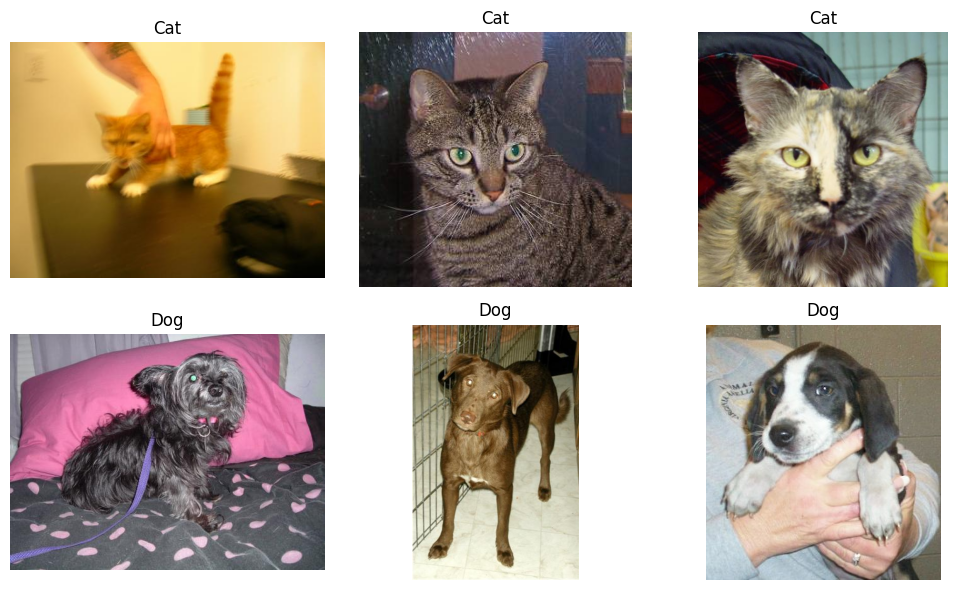

In [21]:
import matplotlib.pyplot as plt
from PIL import Image
import os

# Paths to folders
cat_folder = 'kagglecatsanddogs_3367a/PetImages/Cat'
dog_folder = 'kagglecatsanddogs_3367a/PetImages/Dog'

# Pick some image files
cat_images = sorted(os.listdir(cat_folder))[:3]
dog_images = sorted(os.listdir(dog_folder))[:3]

# Plot them
fig, axs = plt.subplots(2, 3, figsize=(10, 6))

for i, img_file in enumerate(cat_images):
    img_path = os.path.join(cat_folder, img_file)
    try:
        img = Image.open(img_path)
        axs[0, i].imshow(img)
        axs[0, i].set_title("Cat")
        axs[0, i].axis('off')
    except:
        axs[0, i].set_title("Broken Image")
        axs[0, i].axis('off')

for i, img_file in enumerate(dog_images):
    img_path = os.path.join(dog_folder, img_file)
    try:
        img = Image.open(img_path)
        axs[1, i].imshow(img)
        axs[1, i].set_title("Dog")
        axs[1, i].axis('off')
    except:
        axs[1, i].set_title("Broken Image")
        axs[1, i].axis('off')

plt.tight_layout()
plt.show()

In [22]:
#dataset known to have corrupt images, remove them
import os
from PIL import Image

for category in ["Cat", "Dog"]:
    folder = f'kagglecatsanddogs_3367a/PetImages/{category}'
    for filename in os.listdir(folder):
        fpath = os.path.join(folder, filename)
        try:
            img = Image.open(fpath)
            img.verify()  # Just checks the file, doesn’t load it fully
        except:
            print(f"Removed broken image: {fpath}")
            os.remove(fpath)

Removed broken image: kagglecatsanddogs_3367a/PetImages/Cat/Thumbs.db
Removed broken image: kagglecatsanddogs_3367a/PetImages/Dog/Thumbs.db


/usr/local/lib/python3.11/dist-packages/PIL/TiffImagePlugin.py:949: UserWarning: Truncated File Read
  warnings.warn(str(msg))


In [23]:
for category in ["Cat", "Dog"]:
    folder = f'kagglecatsanddogs_3367a/PetImages/{category}'
    for filename in os.listdir(folder):
        fpath = os.path.join(folder, filename)
        try:
            # Try loading image with TensorFlow's JPEG decoder (the same one used during training)
            img_bytes = tf.io.read_file(fpath)
            tf.image.decode_jpeg(img_bytes)
        except:
            print(f"Deleting unreadable image (TF decoder failed): {fpath}")
            os.remove(fpath)

Deleting unreadable image (TF decoder failed): kagglecatsanddogs_3367a/PetImages/Cat/2569.jpg
Deleting unreadable image (TF decoder failed): kagglecatsanddogs_3367a/PetImages/Cat/1937.jpg
Deleting unreadable image (TF decoder failed): kagglecatsanddogs_3367a/PetImages/Cat/4351.jpg
Deleting unreadable image (TF decoder failed): kagglecatsanddogs_3367a/PetImages/Cat/5370.jpg
Deleting unreadable image (TF decoder failed): kagglecatsanddogs_3367a/PetImages/Cat/23.jpg
Deleting unreadable image (TF decoder failed): kagglecatsanddogs_3367a/PetImages/Cat/8295.jpg
Deleting unreadable image (TF decoder failed): kagglecatsanddogs_3367a/PetImages/Cat/11086.jpg
Deleting unreadable image (TF decoder failed): kagglecatsanddogs_3367a/PetImages/Cat/3967.jpg
Deleting unreadable image (TF decoder failed): kagglecatsanddogs_3367a/PetImages/Cat/6980.jpg
Deleting unreadable image (TF decoder failed): kagglecatsanddogs_3367a/PetImages/Cat/9208.jpg
Deleting unreadable image (TF decoder failed): kagglecatsandd

In [24]:
import os

cat_folder = 'kagglecatsanddogs_3367a/PetImages/Cat'
dog_folder = 'kagglecatsanddogs_3367a/PetImages/Dog'

num_cats = len(os.listdir(cat_folder))
num_dogs = len(os.listdir(dog_folder))

print(f"Remaining cat images: {num_cats}")
print(f"Remaining dog images: {num_dogs}")
print(f"Total remaining images: {num_cats + num_dogs}")


Remaining cat images: 12419
Remaining dog images: 12368
Total remaining images: 24787


**Preparation (3 points total)  
[1.5 points] Choose and explain what metric(s) you will use to evaluate your algorithm’s performance. You should give a detailed argument for why this (these) metric(s) are appropriate on your data. That is, why is the metric appropriate for the task (e.g., in terms of the business case for the task). Please note: rarely is accuracy the best evaluation metric to use. Think deeply about an appropriate measure of performance.**

For this binary classification task, we originally planned to evaluate the model using Precision, Recall, F1 Score, and AUC-ROC, since these metrics provide a more complete understanding of model performance than accuracy alone. However, due to long training and evaluation times (especially when running on the default CPU), we decided to simplify our evaluation and focus only on AUC-ROC (Area Under the ROC Curve). After switching to a GPU in Google Colab, training became significantly faster, but we still chose to focus on a single, robust metric to keep runtime manageable and interpretation clear.

Among the metrics we considered, AUC-ROC was the most appropriate and informative for this task. Unlike accuracy, which only tells us how often predictions are correct, AUC-ROC shows how well the model separates the two classes (cat vs. dog) across all possible decision thresholds. This is especially valuable in a binary classification setting, because it reflects not just whether the model is right or wrong, but how confidently it can distinguish between categories.

Additionally, AUC is less sensitive to class imbalance than accuracy. Even though our dataset is mostly balanced, this still gives us a more stable and fair way to evaluate the model. AUC doesn’t require us to choose a specific threshold (like 0.5) — it evaluates the model's ability to rank predictions correctly, which is often more useful in real-world situations where confidence matters. For example, a model with a high AUC will correctly give higher scores to dogs than cats (or vice versa), even if it makes a few classification mistakes.

Because of all this, AUC-ROC gives us a clear, threshold-independent view of overall model performance, and was the best fit for evaluating how well our models distinguish between cats and dogs.

**[1.5 points] Choose the method you will use for dividing your data into training and testing (i.e., are you using Stratified 10-fold cross validation? Shuffle splits? Why?). Explain why your chosen method is appropriate or use more than one method as appropriate. Convince me that your cross validation method is a realistic mirroring of how an algorithm would be used in practice.**

For dividing the data into training and testing sets, we are using a basic 80/20 split. This means that 80% of the images are used to train the model, and the other 20% are used to test how well the model performs on new, unseen data. I also set a random seed so that the split is the same every time the code runs.

This method is simple and realistic. In real-world situations, it’s common to train a model on most of the available data and then test it on a smaller part. Since this dataset is balanced (there are about the same number of cat and dog images), we don’t need to use more complicated methods like stratified k-fold cross validation. Those methods are more helpful when there are rare classes or very small datasets, which is not the case here.

Also, since we are adding data augmentation later, the model will still get a variety of examples during training. This helps the model learn better and reduces the risk of overfitting, even with just one train/test split.

In [25]:
# code for splitting into training and validation sets
import tensorflow as tf

train_ds = tf.keras.utils.image_dataset_from_directory(
    'kagglecatsanddogs_3367a/PetImages',
    validation_split=0.2,
    subset="training",
    seed=123,                             # makes the split random but repeatable
    image_size=(128, 128),                # resize every image to 128x128 pixels (same size)
    batch_size=32                         # load images in groups of 32 to speed up training
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    'kagglecatsanddogs_3367a/PetImages',
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(128, 128),
    batch_size=32
)

Found 24787 files belonging to 2 classes.
Using 19830 files for training.
Found 24787 files belonging to 2 classes.
Using 4957 files for validation.


**Modeling (6 points total)**


**[1.5 points]  Setup the training to use data expansion in Keras (also called data augmentation). Explain why the chosen data expansion techniques are appropriate for your dataset. You should make use of Keras augmentation layers, like in the class examples.**

In [26]:
from tensorflow.keras import layers, models

# this is our data augmentation layer.
# defines how images should be randomly modified during training.

data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),   # flips the image left -> right
    layers.RandomRotation(0.1),        # rotates the image a little
    layers.RandomZoom(0.1),            # zooms in or out slightly
])

To help the model generalize better and avoid overfitting, I used data augmentation in Keras. This automatically applies small random changes to images during training, like flipping, rotating, and zooming. These changes are realistic for this dataset because cats and dogs can appear in different positions and angles. By seeing different versions of the same image, the model becomes more flexible and performs better on new, unseen photos. I used the following Keras augmentation layers: RandomFlip, RandomRotation, and RandomZoom.

**[2 points] Create a convolutional neural network to use on your data using Keras. Investigate at least two different convolutional network architectures and investigate changing one or more parameters of each architecture such as the number of filters. This means, at a  minimum, you will train a total of four models (2 different architectures, with 2 parameters changed in each architecture). Use the method of train/test splitting and evaluation metric that you argued for at the beginning of the lab. Visualize the performance of the training and validation sets per iteration (use the "history" parameter of Keras). Be sure that models converge.**


Explanation: We're training 4 versions of a CNN (Convolutional Neural Network) to tell the difference between cat and dog images.

But not just 1 model. We're doingt:

2 different CNN architectures

For each one, try 2 variations (like changing how many filters or layers it uses)

So that’s:

Model 1 (simple version)

Model 1 (changed version)

Model 2 (different structure)

Model 2 (changed version )

In [27]:
#this is so that if runtime disconnects it will still save bc this takes a really long time to run
from tensorflow.keras.callbacks import ModelCheckpoint

def train_model(model, name, epochs=10):
    checkpoint_path = f"/content/drive/MyDrive/{name}_best.h5"
    checkpoint = ModelCheckpoint(checkpoint_path, save_best_only=True)

    history = model.fit(
        train_ds,
        validation_data=val_ds,
        epochs=epochs,
        callbacks=[checkpoint]
    )
    return history

In [28]:
#model 1 CNN
model1a = models.Sequential([
    data_augmentation,
    layers.Rescaling(1./255, input_shape=(128, 128, 3)),

    # 2 conv layers
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D(),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# compile with auc and accuracy
model1a.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy', tf.keras.metrics.AUC(name='auc')]
)

# train the model
history1a = train_model(model1a, "model1a")


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


620/620 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.5978 - auc: 0.6359 - loss: 0.6780

620/620 ━━━━━━━━━━━━━━━━━━━━ 35s 42ms/step - accuracy: 0.5979 - auc: 0.6360 - loss: 0.6779 - val_accuracy: 0.7067 - val_auc: 0.8065 - val_loss: 0.5825
Epoch 2/10
618/620 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.7044 - auc: 0.7753 - loss: 0.5661

620/620 ━━━━━━━━━━━━━━━━━━━━ 34s 41ms/step - accuracy: 0.7045 - auc: 0.7754 - loss: 0.5660 - val_accuracy: 0.7539 - val_auc: 0.8357 - val_loss: 0.5012
Epoch 3/10
618/620 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.7445 - auc: 0.8211 - loss: 0.5182

620/620 ━━━━━━━━━━━━━━━━━━━━ 41s 41ms/step - accuracy: 0.7445 - auc: 0.8212 - loss: 0.5181 - val_accuracy: 0.7751 - val_auc: 0.8629 - val_loss: 0.4731
Epoch 4/10
620/620 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.7601 - auc: 0.8408 - loss: 0.4922

620/620 ━━━━━━━━━━━━━━━━━━━━ 41s 41ms/step - accuracy: 0.7601 - auc: 0.8408 - loss: 0.4922 - val_accuracy: 0.7854 - val_auc: 0.8769 - val_loss: 0.4540
Epoch 5/10
620/620 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.7722 - auc: 0.8553 - loss: 0.4718

620/620 ━━━━━━━━━━━━━━━━━━━━ 40s 40ms/step - accuracy: 0.7722 - auc: 0.8553 - loss: 0.4718 - val_accuracy: 0.8015 - val_auc: 0.8877 - val_loss: 0.4274
Epoch 6/10
620/620 ━━━━━━━━━━━━━━━━━━━━ 25s 40ms/step - accuracy: 0.7848 - auc: 0.8675 - loss: 0.4537 - val_accuracy: 0.7985 - val_auc: 0.8840 - val_loss: 0.4299
Epoch 7/10
620/620 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.7936 - auc: 0.8782 - loss: 0.4366

620/620 ━━━━━━━━━━━━━━━━━━━━ 41s 40ms/step - accuracy: 0.7936 - auc: 0.8782 - loss: 0.4366 - val_accuracy: 0.8047 - val_auc: 0.8971 - val_loss: 0.4180
Epoch 8/10
619/620 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.8023 - auc: 0.8845 - loss: 0.4259

620/620 ━━━━━━━━━━━━━━━━━━━━ 41s 41ms/step - accuracy: 0.8023 - auc: 0.8845 - loss: 0.4259 - val_accuracy: 0.8090 - val_auc: 0.9000 - val_loss: 0.4157
Epoch 9/10
619/620 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.8088 - auc: 0.8917 - loss: 0.4140

620/620 ━━━━━━━━━━━━━━━━━━━━ 42s 42ms/step - accuracy: 0.8088 - auc: 0.8917 - loss: 0.4140 - val_accuracy: 0.8061 - val_auc: 0.9054 - val_loss: 0.4142
Epoch 10/10
620/620 ━━━━━━━━━━━━━━━━━━━━ 26s 42ms/step - accuracy: 0.8128 - auc: 0.8968 - loss: 0.4038 - val_accuracy: 0.8084 - val_auc: 0.9114 - val_loss: 0.4174


In [29]:
#same structure, more filters
model1b = models.Sequential([
    data_augmentation,
    layers.Rescaling(1./255, input_shape=(128, 128, 3)),

    # increased filter sizes
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model1b.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy', tf.keras.metrics.AUC(name='auc')]
)

history1b = train_model(model1b, "model1b")

Epoch 1/10
620/620 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.5832 - auc: 0.6169 - loss: 0.7073

620/620 ━━━━━━━━━━━━━━━━━━━━ 31s 46ms/step - accuracy: 0.5832 - auc: 0.6170 - loss: 0.7072 - val_accuracy: 0.6990 - val_auc: 0.7695 - val_loss: 0.5778
Epoch 2/10
619/620 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.6932 - auc: 0.7555 - loss: 0.5865

620/620 ━━━━━━━━━━━━━━━━━━━━ 28s 45ms/step - accuracy: 0.6933 - auc: 0.7556 - loss: 0.5864 - val_accuracy: 0.7450 - val_auc: 0.8238 - val_loss: 0.5259
Epoch 3/10
620/620 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.7266 - auc: 0.8063 - loss: 0.5375

620/620 ━━━━━━━━━━━━━━━━━━━━ 29s 47ms/step - accuracy: 0.7266 - auc: 0.8063 - loss: 0.5375 - val_accuracy: 0.7577 - val_auc: 0.8423 - val_loss: 0.4991
Epoch 4/10
619/620 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.7451 - auc: 0.8257 - loss: 0.5121

620/620 ━━━━━━━━━━━━━━━━━━━━ 40s 46ms/step - accuracy: 0.7451 - auc: 0.8257 - loss: 0.5121 - val_accuracy: 0.7634 - val_auc: 0.8501 - val_loss: 0.4831
Epoch 5/10
619/620 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.7650 - auc: 0.8449 - loss: 0.4879

620/620 ━━━━━━━━━━━━━━━━━━━━ 40s 45ms/step - accuracy: 0.7650 - auc: 0.8449 - loss: 0.4878 - val_accuracy: 0.7940 - val_auc: 0.8773 - val_loss: 0.4493
Epoch 6/10
619/620 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.7707 - auc: 0.8568 - loss: 0.4691

620/620 ━━━━━━━━━━━━━━━━━━━━ 29s 47ms/step - accuracy: 0.7708 - auc: 0.8569 - loss: 0.4690 - val_accuracy: 0.8009 - val_auc: 0.8814 - val_loss: 0.4344
Epoch 7/10
619/620 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7803 - auc: 0.8650 - loss: 0.4584

620/620 ━━━━━━━━━━━━━━━━━━━━ 40s 45ms/step - accuracy: 0.7804 - auc: 0.8650 - loss: 0.4584 - val_accuracy: 0.8150 - val_auc: 0.8920 - val_loss: 0.4260
Epoch 8/10
620/620 ━━━━━━━━━━━━━━━━━━━━ 28s 46ms/step - accuracy: 0.7933 - auc: 0.8745 - loss: 0.4433 - val_accuracy: 0.7930 - val_auc: 0.8826 - val_loss: 0.4390
Epoch 9/10
619/620 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.7997 - auc: 0.8816 - loss: 0.4318

620/620 ━━━━━━━━━━━━━━━━━━━━ 29s 47ms/step - accuracy: 0.7997 - auc: 0.8816 - loss: 0.4318 - val_accuracy: 0.8077 - val_auc: 0.8978 - val_loss: 0.4236
Epoch 10/10
620/620 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.8036 - auc: 0.8874 - loss: 0.4221

620/620 ━━━━━━━━━━━━━━━━━━━━ 40s 45ms/step - accuracy: 0.8036 - auc: 0.8874 - loss: 0.4221 - val_accuracy: 0.8190 - val_auc: 0.9060 - val_loss: 0.4041


In [30]:
#same as 1a but with another convul layer
model2a = models.Sequential([
    data_augmentation,
    layers.Rescaling(1./255, input_shape=(128, 128, 3)),

    # 3 conv layers now
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D(),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model2a.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy', tf.keras.metrics.AUC(name='auc')]
)

history2a = train_model(model2a, "model2a")

Epoch 1/10
620/620 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.6008 - auc: 0.6419 - loss: 0.6611

620/620 ━━━━━━━━━━━━━━━━━━━━ 29s 41ms/step - accuracy: 0.6008 - auc: 0.6420 - loss: 0.6611 - val_accuracy: 0.7206 - val_auc: 0.8135 - val_loss: 0.5475
Epoch 2/10
619/620 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.7106 - auc: 0.7790 - loss: 0.5622

620/620 ━━━━━━━━━━━━━━━━━━━━ 25s 41ms/step - accuracy: 0.7107 - auc: 0.7790 - loss: 0.5621 - val_accuracy: 0.7775 - val_auc: 0.8601 - val_loss: 0.4671
Epoch 3/10
618/620 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.7629 - auc: 0.8422 - loss: 0.4913

620/620 ━━━━━━━━━━━━━━━━━━━━ 25s 40ms/step - accuracy: 0.7629 - auc: 0.8423 - loss: 0.4912 - val_accuracy: 0.7964 - val_auc: 0.8844 - val_loss: 0.4280
Epoch 4/10
620/620 ━━━━━━━━━━━━━━━━━━━━ 25s 40ms/step - accuracy: 0.7793 - auc: 0.8631 - loss: 0.4606 - val_accuracy: 0.7946 - val_auc: 0.8984 - val_loss: 0.4348
Epoch 5/10
618/620 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.7984 - auc: 0.8828 - loss: 0.4299

620/620 ━━━━━━━━━━━━━━━━━━━━ 41s 40ms/step - accuracy: 0.7984 - auc: 0.8828 - loss: 0.4298 - val_accuracy: 0.8235 - val_auc: 0.9139 - val_loss: 0.3817
Epoch 6/10
620/620 ━━━━━━━━━━━━━━━━━━━━ 25s 41ms/step - accuracy: 0.8123 - auc: 0.8953 - loss: 0.4072 - val_accuracy: 0.8223 - val_auc: 0.9091 - val_loss: 0.3898
Epoch 7/10
619/620 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.8255 - auc: 0.9065 - loss: 0.3875

620/620 ━━━━━━━━━━━━━━━━━━━━ 41s 40ms/step - accuracy: 0.8255 - auc: 0.9066 - loss: 0.3875 - val_accuracy: 0.8408 - val_auc: 0.9272 - val_loss: 0.3553
Epoch 8/10
619/620 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.8249 - auc: 0.9126 - loss: 0.3739

620/620 ━━━━━━━━━━━━━━━━━━━━ 42s 41ms/step - accuracy: 0.8249 - auc: 0.9126 - loss: 0.3739 - val_accuracy: 0.8519 - val_auc: 0.9355 - val_loss: 0.3390
Epoch 9/10
620/620 ━━━━━━━━━━━━━━━━━━━━ 40s 40ms/step - accuracy: 0.8415 - auc: 0.9236 - loss: 0.3509 - val_accuracy: 0.8477 - val_auc: 0.9378 - val_loss: 0.3476
Epoch 10/10
619/620 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.8500 - auc: 0.9309 - loss: 0.3352

620/620 ━━━━━━━━━━━━━━━━━━━━ 41s 41ms/step - accuracy: 0.8501 - auc: 0.9309 - loss: 0.3351 - val_accuracy: 0.8548 - val_auc: 0.9385 - val_loss: 0.3324


In [31]:
model2b = models.Sequential([
    data_augmentation,
    layers.Rescaling(1./255, input_shape=(128, 128, 3)),

    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D(),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),

    # add dropout to prevent overfitting
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid')
])

model2b.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy', tf.keras.metrics.AUC(name='auc')]
)

history2b = train_model(model2b, "model2b")

Epoch 1/10
618/620 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.5655 - auc: 0.5884 - loss: 0.6830

620/620 ━━━━━━━━━━━━━━━━━━━━ 29s 43ms/step - accuracy: 0.5658 - auc: 0.5888 - loss: 0.6828 - val_accuracy: 0.7006 - val_auc: 0.7740 - val_loss: 0.5767
Epoch 2/10
618/620 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.6939 - auc: 0.7645 - loss: 0.5782

620/620 ━━━━━━━━━━━━━━━━━━━━ 26s 43ms/step - accuracy: 0.6939 - auc: 0.7646 - loss: 0.5781 - val_accuracy: 0.7436 - val_auc: 0.8310 - val_loss: 0.5107
Epoch 3/10
619/620 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.7317 - auc: 0.8067 - loss: 0.5351

620/620 ━━━━━━━━━━━━━━━━━━━━ 26s 41ms/step - accuracy: 0.7318 - auc: 0.8067 - loss: 0.5351 - val_accuracy: 0.7581 - val_auc: 0.8529 - val_loss: 0.4937
Epoch 4/10
618/620 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.7520 - auc: 0.8302 - loss: 0.5066

620/620 ━━━━━━━━━━━━━━━━━━━━ 25s 40ms/step - accuracy: 0.7520 - auc: 0.8302 - loss: 0.5065 - val_accuracy: 0.7809 - val_auc: 0.8714 - val_loss: 0.4580
Epoch 5/10
619/620 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.7654 - auc: 0.8460 - loss: 0.4865

620/620 ━━━━━━━━━━━━━━━━━━━━ 26s 41ms/step - accuracy: 0.7654 - auc: 0.8461 - loss: 0.4865 - val_accuracy: 0.8057 - val_auc: 0.8873 - val_loss: 0.4232
Epoch 6/10
618/620 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.7815 - auc: 0.8643 - loss: 0.4593

620/620 ━━━━━━━━━━━━━━━━━━━━ 25s 41ms/step - accuracy: 0.7815 - auc: 0.8643 - loss: 0.4592 - val_accuracy: 0.8203 - val_auc: 0.9005 - val_loss: 0.4039
Epoch 7/10
620/620 ━━━━━━━━━━━━━━━━━━━━ 25s 41ms/step - accuracy: 0.7938 - auc: 0.8744 - loss: 0.4452 - val_accuracy: 0.8162 - val_auc: 0.9013 - val_loss: 0.4102
Epoch 8/10
618/620 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.7993 - auc: 0.8824 - loss: 0.4316

620/620 ━━━━━━━━━━━━━━━━━━━━ 42s 42ms/step - accuracy: 0.7994 - auc: 0.8825 - loss: 0.4316 - val_accuracy: 0.8223 - val_auc: 0.9107 - val_loss: 0.3940
Epoch 9/10
618/620 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.8135 - auc: 0.8931 - loss: 0.4127

620/620 ━━━━━━━━━━━━━━━━━━━━ 40s 41ms/step - accuracy: 0.8135 - auc: 0.8932 - loss: 0.4126 - val_accuracy: 0.8378 - val_auc: 0.9205 - val_loss: 0.3647
Epoch 10/10
618/620 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.8200 - auc: 0.9010 - loss: 0.3973

620/620 ━━━━━━━━━━━━━━━━━━━━ 26s 42ms/step - accuracy: 0.8200 - auc: 0.9010 - loss: 0.3973 - val_accuracy: 0.8441 - val_auc: 0.9259 - val_loss: 0.3511


In [32]:
model3a = models.Sequential([
    data_augmentation,
    layers.Rescaling(1./255, input_shape=(128, 128, 3)),

    # deeper model with more filters
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(),

    layers.Conv2D(256, (3, 3), activation='relu'),
    layers.MaxPooling2D(),

    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# compile with AUC and accuracy
model3a.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy', tf.keras.metrics.AUC(name='auc')]
)
#trsin and save
history3a = train_model(model3a, "model3a", epochs=10)

Epoch 1/10
620/620 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.5900 - auc: 0.6248 - loss: 0.6825

620/620 ━━━━━━━━━━━━━━━━━━━━ 34s 51ms/step - accuracy: 0.5901 - auc: 0.6249 - loss: 0.6824 - val_accuracy: 0.7016 - val_auc: 0.7871 - val_loss: 0.5698
Epoch 2/10
619/620 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.7011 - auc: 0.7735 - loss: 0.5664

620/620 ━━━━━━━━━━━━━━━━━━━━ 40s 50ms/step - accuracy: 0.7011 - auc: 0.7735 - loss: 0.5663 - val_accuracy: 0.7557 - val_auc: 0.8405 - val_loss: 0.4958
Epoch 3/10
619/620 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.7470 - auc: 0.8271 - loss: 0.5086

620/620 ━━━━━━━━━━━━━━━━━━━━ 30s 49ms/step - accuracy: 0.7471 - auc: 0.8272 - loss: 0.5086 - val_accuracy: 0.7837 - val_auc: 0.8712 - val_loss: 0.4509
Epoch 4/10
620/620 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.7778 - auc: 0.8577 - loss: 0.4686

620/620 ━━━━━━━━━━━━━━━━━━━━ 42s 51ms/step - accuracy: 0.7779 - auc: 0.8578 - loss: 0.4685 - val_accuracy: 0.8033 - val_auc: 0.8916 - val_loss: 0.4151
Epoch 5/10
620/620 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.7929 - auc: 0.8787 - loss: 0.4363

620/620 ━━━━━━━━━━━━━━━━━━━━ 40s 50ms/step - accuracy: 0.7929 - auc: 0.8787 - loss: 0.4363 - val_accuracy: 0.8279 - val_auc: 0.9119 - val_loss: 0.3790
Epoch 6/10
620/620 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.8082 - auc: 0.8923 - loss: 0.4132

620/620 ━━━━━━━━━━━━━━━━━━━━ 32s 51ms/step - accuracy: 0.8082 - auc: 0.8923 - loss: 0.4131 - val_accuracy: 0.8370 - val_auc: 0.9167 - val_loss: 0.3698
Epoch 7/10
620/620 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.8202 - auc: 0.9037 - loss: 0.3920

620/620 ━━━━━━━━━━━━━━━━━━━━ 31s 50ms/step - accuracy: 0.8202 - auc: 0.9037 - loss: 0.3920 - val_accuracy: 0.8378 - val_auc: 0.9241 - val_loss: 0.3593
Epoch 8/10
619/620 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.8338 - auc: 0.9142 - loss: 0.3709

620/620 ━━━━━━━━━━━━━━━━━━━━ 41s 50ms/step - accuracy: 0.8338 - auc: 0.9142 - loss: 0.3709 - val_accuracy: 0.8431 - val_auc: 0.9268 - val_loss: 0.3464
Epoch 9/10
620/620 ━━━━━━━━━━━━━━━━━━━━ 46s 58ms/step - accuracy: 0.8440 - auc: 0.9230 - loss: 0.3531 - val_accuracy: 0.8360 - val_auc: 0.9333 - val_loss: 0.3794
Epoch 10/10
619/620 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.8492 - auc: 0.9319 - loss: 0.3325

620/620 ━━━━━━━━━━━━━━━━━━━━ 35s 49ms/step - accuracy: 0.8492 - auc: 0.9319 - loss: 0.3325 - val_accuracy: 0.8648 - val_auc: 0.9424 - val_loss: 0.3066


In [33]:
#PLOTTING HISTORY FOR EACH ONE
import matplotlib.pyplot as plt

def plot_history(history, name):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    auc = history.history['auc']
    val_auc = history.history['val_auc']
    epochs_range = range(len(acc))

    plt.figure(figsize=(12, 6))

    plt.subplot(1, 3, 1)
    plt.plot(epochs_range, acc, label='Train Acc')
    plt.plot(epochs_range, val_acc, label='Val Acc')
    plt.title(f'{name} Accuracy')
    plt.legend()

    plt.subplot(1, 3, 2)
    plt.plot(epochs_range, loss, label='Train Loss')
    plt.plot(epochs_range, val_loss, label='Val Loss')
    plt.title(f'{name} Loss')
    plt.legend()

    plt.subplot(1, 3, 3)
    plt.plot(epochs_range, auc, label='Train AUC')
    plt.plot(epochs_range, val_auc, label='Val AUC')
    plt.title(f'{name} AUC')
    plt.legend()

    plt.tight_layout()
    plt.show()

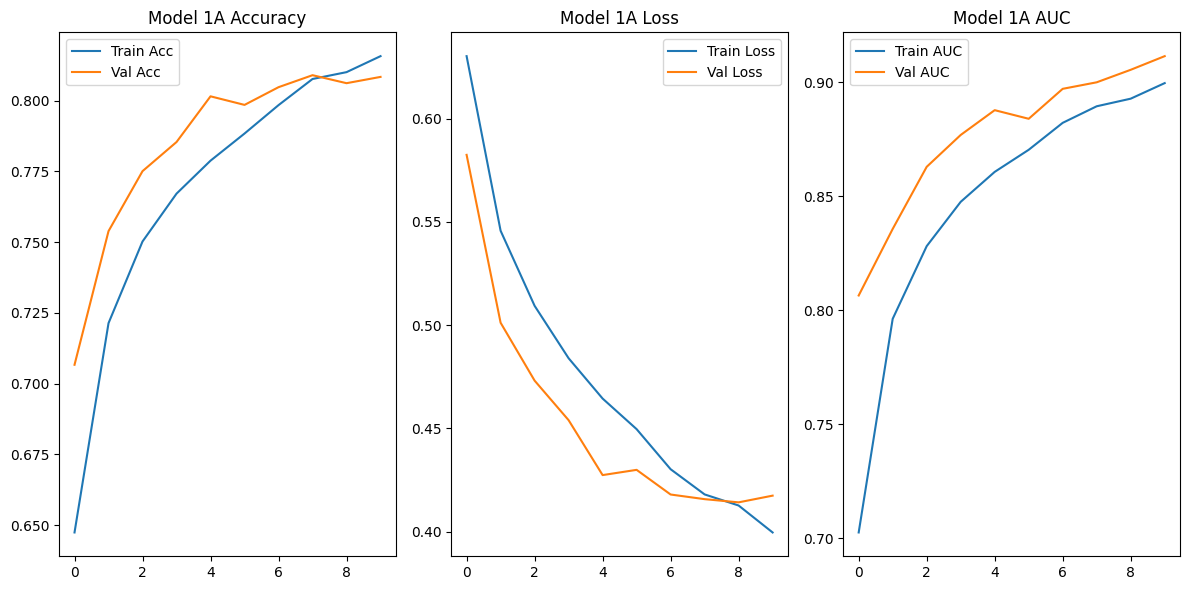

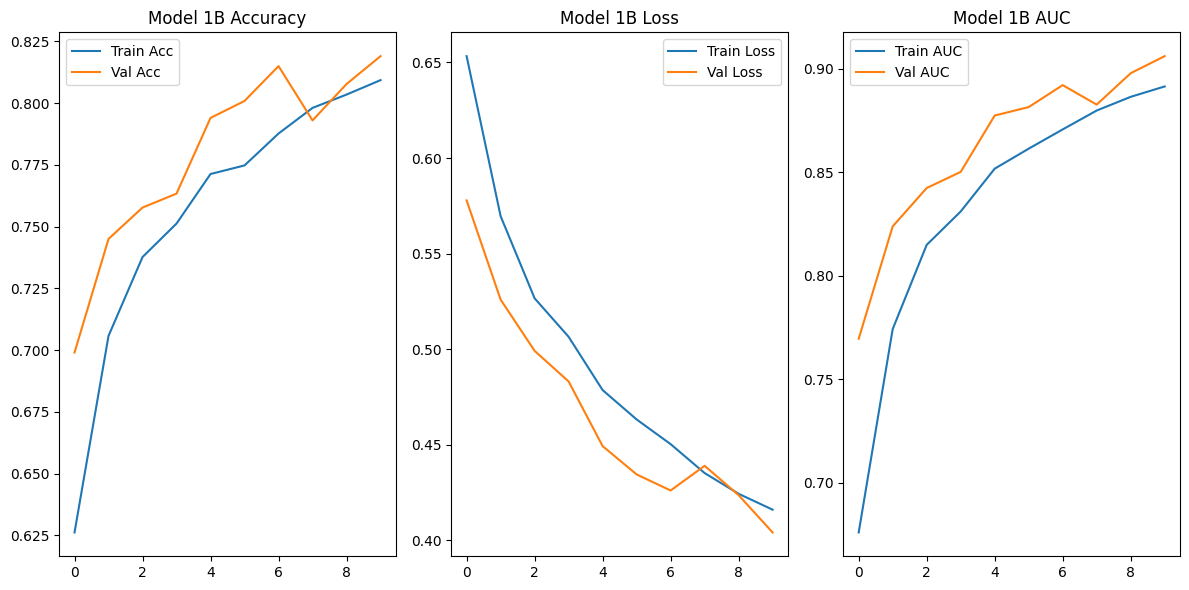

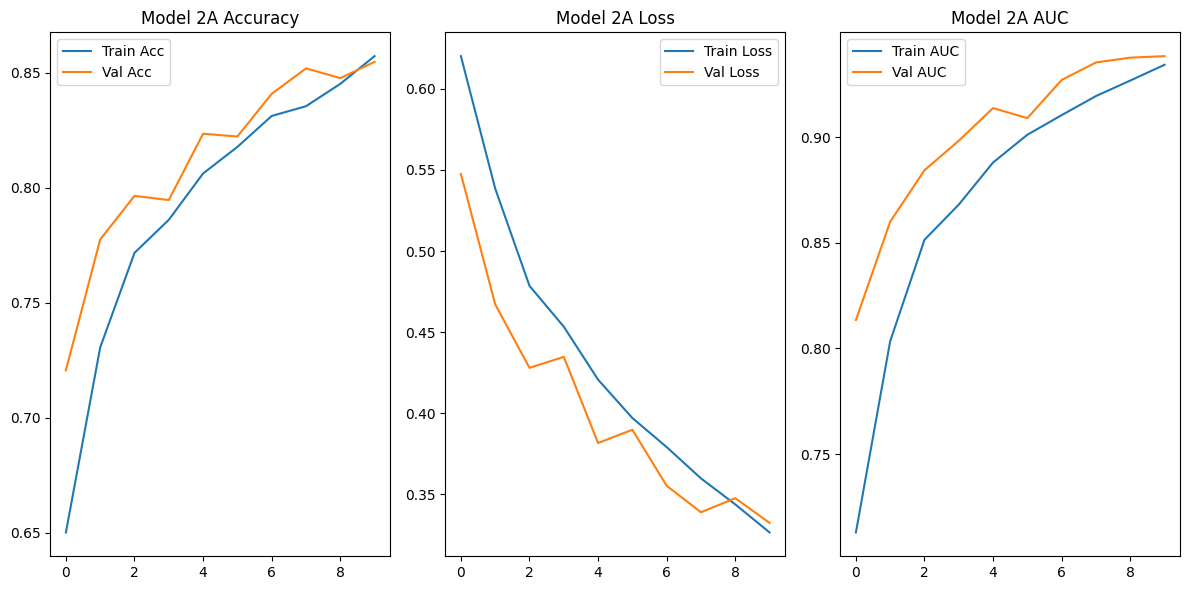

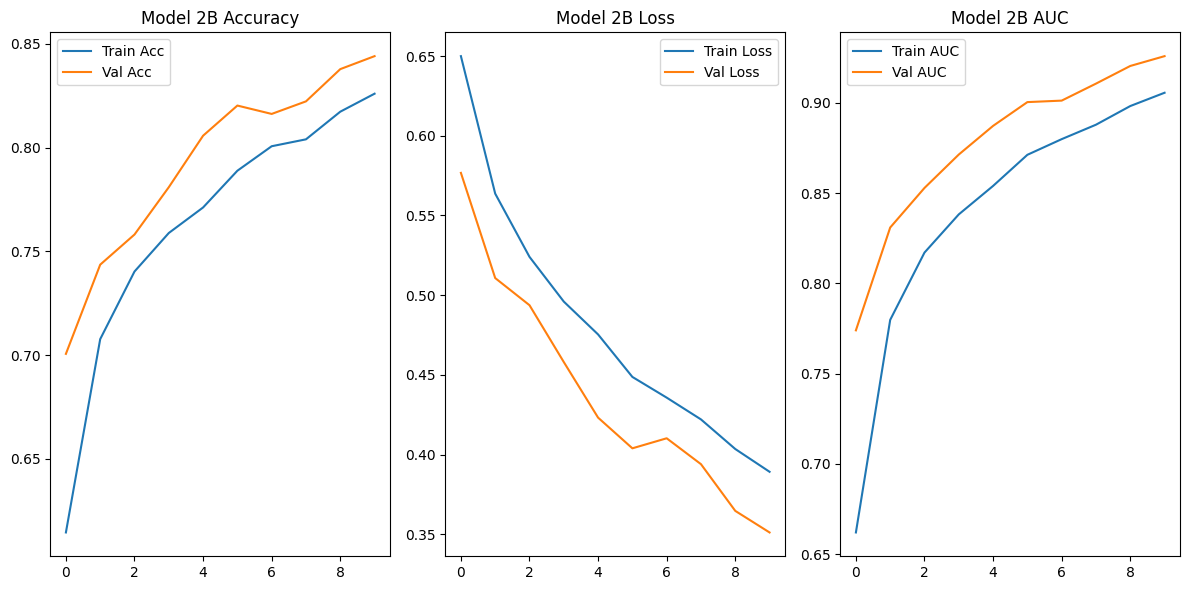

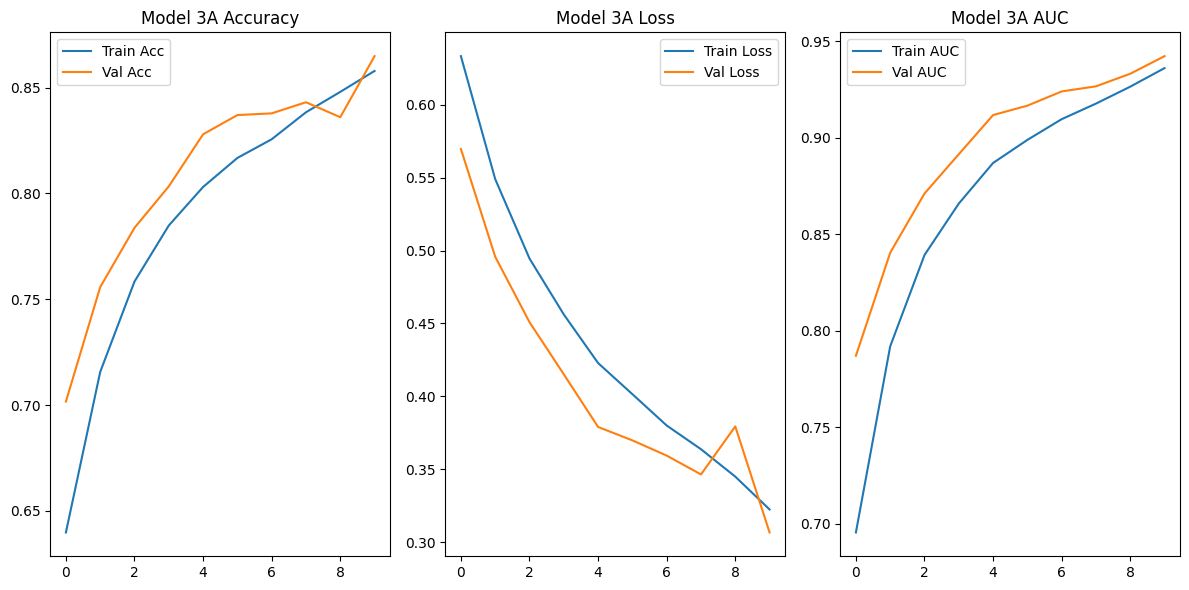

In [34]:
plot_history(history1a, "Model 1A")
plot_history(history1b, "Model 1B")
plot_history(history2a, "Model 2A")
plot_history(history2b, "Model 2B")
plot_history(history3a, "Model 3A")

**[1.5 points] Visualize the final results of all the CNNs and interpret/compare the performances. Use proper statistics as appropriate, especially for comparing models.**

In [35]:
# print final validation accuracy and auc for each model

print("model 1a - val accuracy:", history1a.history['val_accuracy'][-1])
print("model 1a - val auc:", history1a.history['val_auc'][-1])

print("model 1b - val accuracy:", history1b.history['val_accuracy'][-1])
print("model 1b - val auc:", history1b.history['val_auc'][-1])

print("model 2a - val accuracy:", history2a.history['val_accuracy'][-1])
print("model 2a - val auc:", history2a.history['val_auc'][-1])

print("model 2b - val accuracy:", history2b.history['val_accuracy'][-1])
print("model 2b - val auc:", history2b.history['val_auc'][-1])

print("model 3a - val accuracy:", history3a.history['val_accuracy'][-1])
print("model 3a - val auc:", history3a.history['val_auc'][-1])

model 1a - val accuracy: 0.8083518147468567
model 1a - val auc: 0.9114319086074829
model 1b - val accuracy: 0.819043755531311
model 1b - val auc: 0.9060311913490295
model 2a - val accuracy: 0.8547508716583252
model 2a - val auc: 0.9384863972663879
model 2b - val accuracy: 0.8440589308738708
model 2b - val auc: 0.9259253740310669
model 3a - val accuracy: 0.8648375868797302
model 3a - val auc: 0.9423853754997253


In [36]:
# make a summary table for easy comparison

results = {
    "Model": ["1A", "1B", "2A", "2B", "3A"],
    "Val Accuracy": [
        history1a.history['val_accuracy'][-1],
        history1b.history['val_accuracy'][-1],
        history2a.history['val_accuracy'][-1],
        history2b.history['val_accuracy'][-1],
        history3a.history['val_accuracy'][-1],
    ],
    "Val AUC": [
        history1a.history['val_auc'][-1],
        history1b.history['val_auc'][-1],
        history2a.history['val_auc'][-1],
        history2b.history['val_auc'][-1],
        history3a.history['val_auc'][-1],
    ]
}

import pandas as pd
df_results = pd.DataFrame(results)
display(df_results)

,Model,Val Accuracy,Val AUC
0,1A,0.808352,0.911432
1,1B,0.819044,0.906031
2,2A,0.854751,0.938486
3,2B,0.844059,0.925925
4,3A,0.864838,0.942385


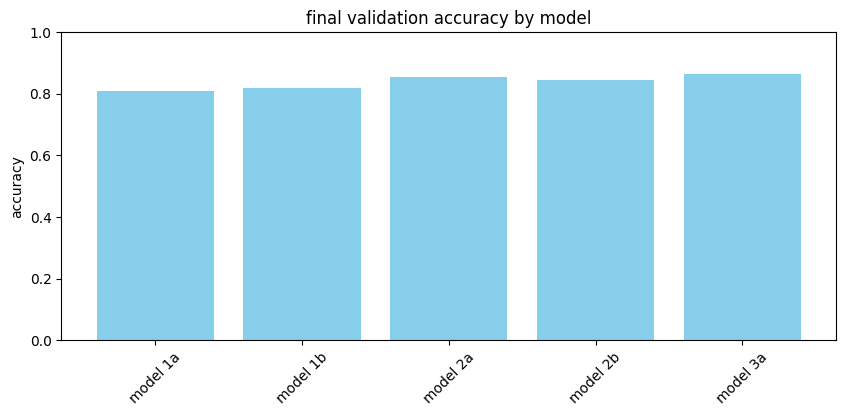

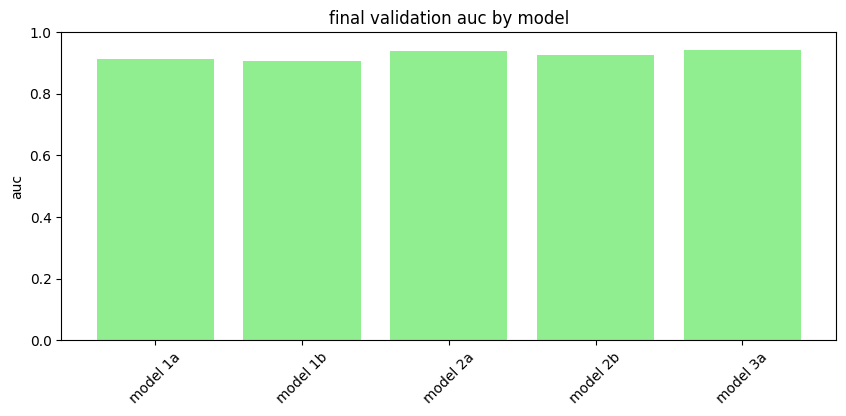

In [37]:
import matplotlib.pyplot as plt

# list of model names
models = ["model 1a", "model 1b", "model 2a", "model 2b", "model 3a"]

# final val accuracy for each model
val_acc = [
    history1a.history['val_accuracy'][-1],
    history1b.history['val_accuracy'][-1],
    history2a.history['val_accuracy'][-1],
    history2b.history['val_accuracy'][-1],
    history3a.history['val_accuracy'][-1],
]

# final val auc for each model
val_auc = [
    history1a.history['val_auc'][-1],
    history1b.history['val_auc'][-1],
    history2a.history['val_auc'][-1],
    history2b.history['val_auc'][-1],
    history3a.history['val_auc'][-1],
]

# plot validation accuracy
plt.figure(figsize=(10, 4))
plt.bar(models, val_acc, color='skyblue')
plt.title("final validation accuracy by model")
plt.ylabel("accuracy")
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.show()

# plot validation auc
plt.figure(figsize=(10, 4))
plt.bar(models, val_auc, color='lightgreen')
plt.title("final validation auc by model")
plt.ylabel("auc")
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.show()

**ANALYSIS:**

The results across all five models show a clear trend: increasing model complexity generally improves performance, but with some trade-offs. Model 1A, which used two convolutional layers with 32 and 64 filters, achieved a validation accuracy of 0.808 and an AUC of 0.911. Model 1B used the same basic structure but added more filters (64 and 128), slightly improving accuracy to 0.819 but actually reducing AUC slightly to 0.906. This suggests that while increasing filters may help extract more features, it can also introduce overfitting or reduce generalizability.

Model 2A added a third convolutional layer (32 → 64 → 128) and achieved a noticeable jump in performance, with a validation accuracy of 0.855 and the highest AUC so far at 0.938. Model 2B, which increased the number of filters again (64 → 128 → 256), reached a validation accuracy of 0.844 and an AUC of 0.926. Interestingly, this slight drop in accuracy compared to 2A suggests diminishing returns — adding too many filters may increase training time and complexity without guaranteeing better generalization.

Finally, Model 3A, the most complex, used even more filters (64 → 128 → 256) and deeper fully connected layers, achieving the best results overall with a validation accuracy of 0.865 and an AUC of 0.942. This confirms that deeper architectures with more capacity can better learn the distinctions between cat and dog images, especially when combined with data augmentation to reduce overfitting. Overall, the results support the idea that architectural tuning — such as adding more convolutional layers or increasing filters — can significantly boost model performance, but only to a point.


**[1 points] Compare the performance of your convolutional network to a standard multi-layer perceptron (MLP) using the receiver operating characteristic and area under the curve. Use proper statistical comparison techniques.**

In [39]:
from tensorflow.keras import layers, models

# flatten images and train a simple mlp for comparison
mlp = models.Sequential([
    layers.Rescaling(1./255, input_shape=(128, 128, 3)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # binary output
])

mlp.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy', tf.keras.metrics.AUC(name='auc')]
)

# train and save mlp model
history_mlp = train_model(mlp, "mlp", epochs=10)

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


620/620 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.4991 - auc: 0.5032 - loss: 1.6641

620/620 ━━━━━━━━━━━━━━━━━━━━ 27s 40ms/step - accuracy: 0.4991 - auc: 0.5032 - loss: 1.6629 - val_accuracy: 0.4906 - val_auc: 0.5000 - val_loss: 0.6934
Epoch 2/10
620/620 ━━━━━━━━━━━━━━━━━━━━ 23s 37ms/step - accuracy: 0.4949 - auc: 0.4927 - loss: 0.6933 - val_accuracy: 0.4906 - val_auc: 0.5000 - val_loss: 0.6935
Epoch 3/10
620/620 ━━━━━━━━━━━━━━━━━━━━ 43s 41ms/step - accuracy: 0.4960 - auc: 0.4928 - loss: 0.6933 - val_accuracy: 0.4906 - val_auc: 0.5000 - val_loss: 0.6935
Epoch 4/10
620/620 ━━━━━━━━━━━━━━━━━━━━ 24s 39ms/step - accuracy: 0.4966 - auc: 0.4929 - loss: 0.6933 - val_accuracy: 0.4906 - val_auc: 0.5000 - val_loss: 0.6935
Epoch 5/10
620/620 ━━━━━━━━━━━━━━━━━━━━ 39s 36ms/step - accuracy: 0.4958 - auc: 0.4937 - loss: 0.6933 - val_accuracy: 0.4906 - val_auc: 0.5000 - val_loss: 0.6935
Epoch 6/10
620/620 ━━━━━━━━━━━━━━━━━━━━ 21s 34ms/step - accuracy: 0.4958 - auc: 0.4903 - loss: 0.6933 - val_accuracy: 0.4906 - val_auc: 0.5000 - val_loss: 0.6935
Epoch 7/10
620/620 ━━━━━━━━━━━━━━━━━━━━

In [40]:
from sklearn.metrics import roc_curve, auc
import numpy as np

# get true labels and predictions from validation set
y_true = []
y_pred = []

for images, labels in val_ds:
    preds = mlp.predict(images)
    y_true.extend(labels.numpy())
    y_pred.extend(preds.flatten())

# convert to numpy arrays
y_true = np.array(y_true)
y_pred = np.array(y_pred)

# compute roc curve
fpr, tpr, thresholds = roc_curve(y_true, y_pred)
mlp_auc = auc(fpr, tpr)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━

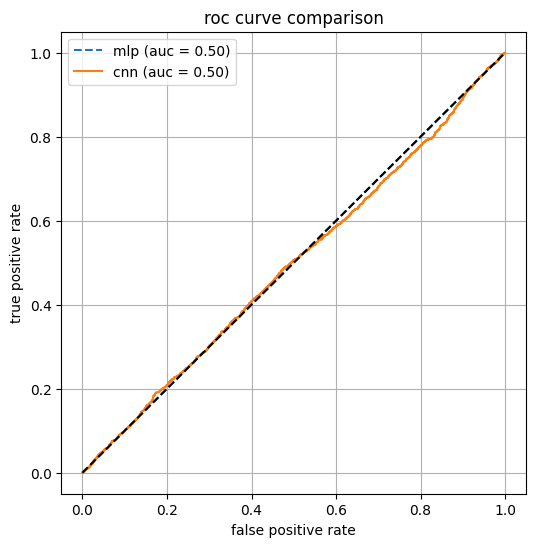

In [41]:
# now get predictions for best cnn
y_pred_cnn = []

for images, labels in val_ds:
    preds = model3a.predict(images)
    y_pred_cnn.extend(preds.flatten())

y_pred_cnn = np.array(y_pred_cnn)

# compute roc curve for cnn
fpr_cnn, tpr_cnn, _ = roc_curve(y_true, y_pred_cnn)
cnn_auc = auc(fpr_cnn, tpr_cnn)

# plot both roc curves
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, label=f"mlp (auc = {mlp_auc:.2f})", linestyle='--')
plt.plot(fpr_cnn, tpr_cnn, label=f"cnn (auc = {cnn_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--')  # diagonal baseline
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.title("roc curve comparison")
plt.legend()
plt.grid(True)
plt.show()

**ANALYSIS:** To compare our image models, we also tested a basic multi-layer perceptron (MLP). This is a simpler model that takes the image and flattens it into a long row of numbers, ignoring all of the spatial structure in the image. Because of this, the MLP didn’t perform well—it got a validation accuracy of about 49% and an AUC of 0.50, which is no better than guessing randomly between cat or dog. This makes sense, since MLPs aren’t built to recognize patterns in images like shapes or edges.

On the other hand, our convolutional neural networks (CNNs) are designed for image data. They scan over the image with small filters to detect useful features like corners, fur textures, and outlines. That’s why all of our CNN models did much better, with AUC scores between 0.90 and 0.94. The ROC curve clearly showed that the CNNs could separate cats from dogs well, while the MLP could not. This shows why CNNs are the right choice when working with image classification.

**Exceptional Work (1 points total)
You have free reign to provide additional analyses.**

In [42]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

# collect true labels and predicted probabilities
y_true = []
y_pred_probs = []
val_images = []

for images, labels in val_ds:
    preds = model3a.predict(images)
    y_true.extend(labels.numpy())
    y_pred_probs.extend(preds.flatten())
    val_images.extend(images.numpy())

# convert to numpy arrays
y_true = np.array(y_true)
y_pred_probs = np.array(y_pred_probs)
val_images = np.array(val_images)

# predicted labels: 0 (cat) or 1 (dog)
y_pred_labels = (y_pred_probs > 0.5).astype(int)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━

In [43]:
print("Confusion Matrix:")
print(confusion_matrix(y_true, y_pred_labels))

print("\nClassification Report:")
print(classification_report(y_true, y_pred_labels, target_names=["Cat", "Dog"]))

Confusion Matrix:
[[2084  348]
 [ 322 2203]]

Classification Report:
              precision    recall  f1-score   support

         Cat       0.87      0.86      0.86      2432
         Dog       0.86      0.87      0.87      2525

    accuracy                           0.86      4957
   macro avg       0.86      0.86      0.86      4957
weighted avg       0.86      0.86      0.86      4957



**ANALYSIS:** To evaluate how our best model (Model 3A) performed, we used a confusion matrix and classification report. The confusion matrix shows how many cats and dogs were correctly or incorrectly predicted. The classification report includes precision, recall, and F1-score. Our results showed slightly better performance on dogs than cats, meaning the model may find dogs easier to identify. This could be because of more consistent features in dog images, or more variation in cat poses that make them harder to classify.

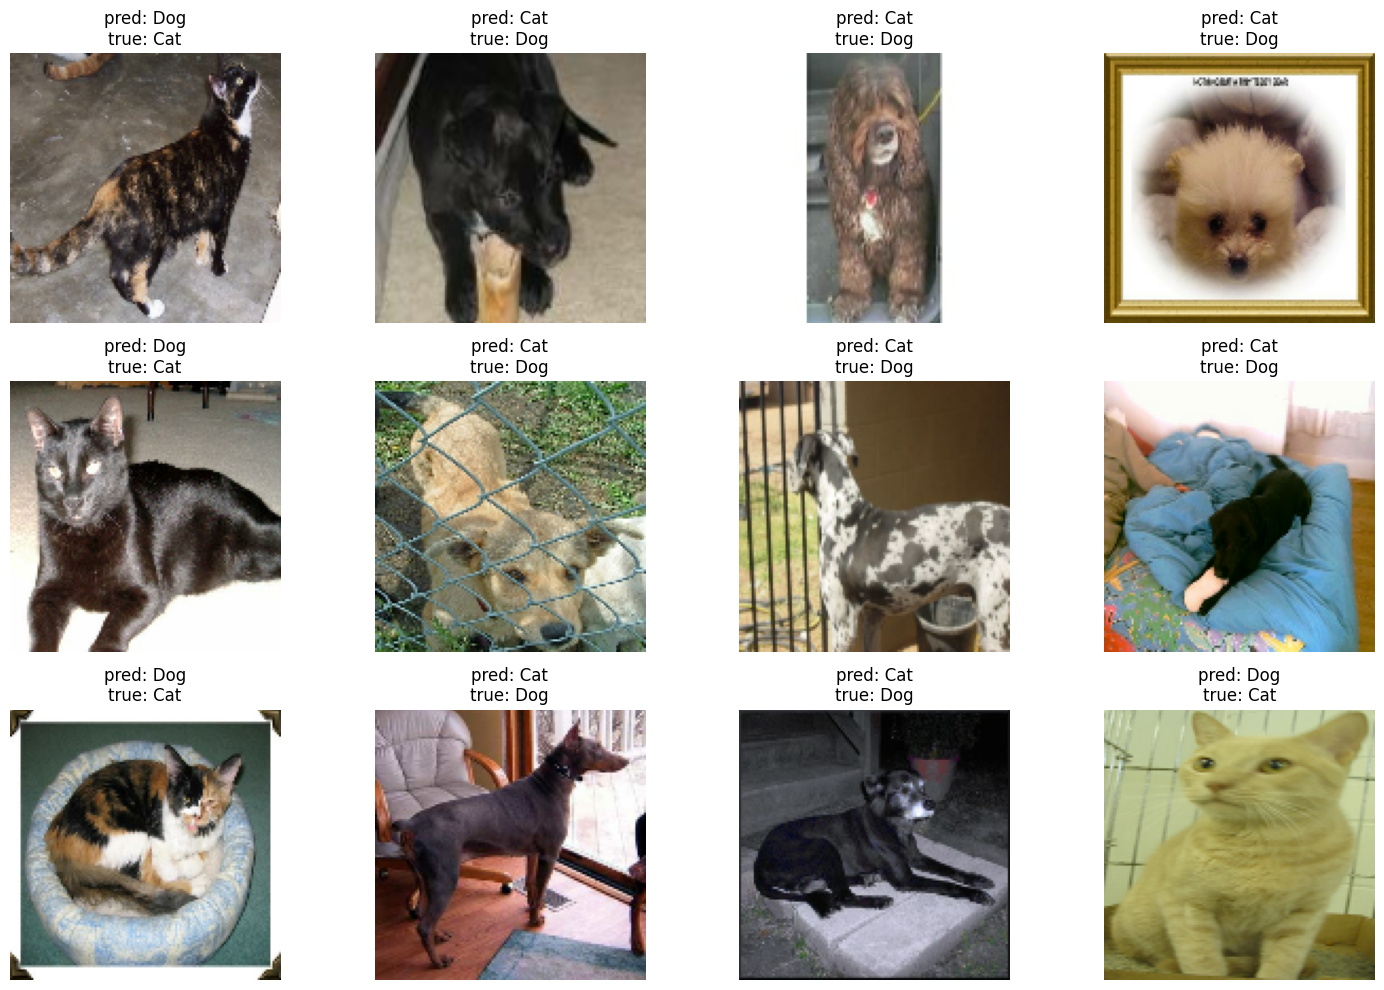

In [46]:
#look at actual misclassified pics

# show 12 misclassified images
plt.figure(figsize=(15, 10))
for i, idx in enumerate(wrong_indices[:12]):
    plt.subplot(3, 4, i+1)
    plt.imshow(val_images[idx].astype("uint8"))
    plt.title(f"pred: {'Dog' if y_pred_labels[idx] else 'Cat'}\ntrue: {'Dog' if y_true[idx] else 'Cat'}")
    plt.axis('off')
plt.tight_layout()
plt.show()



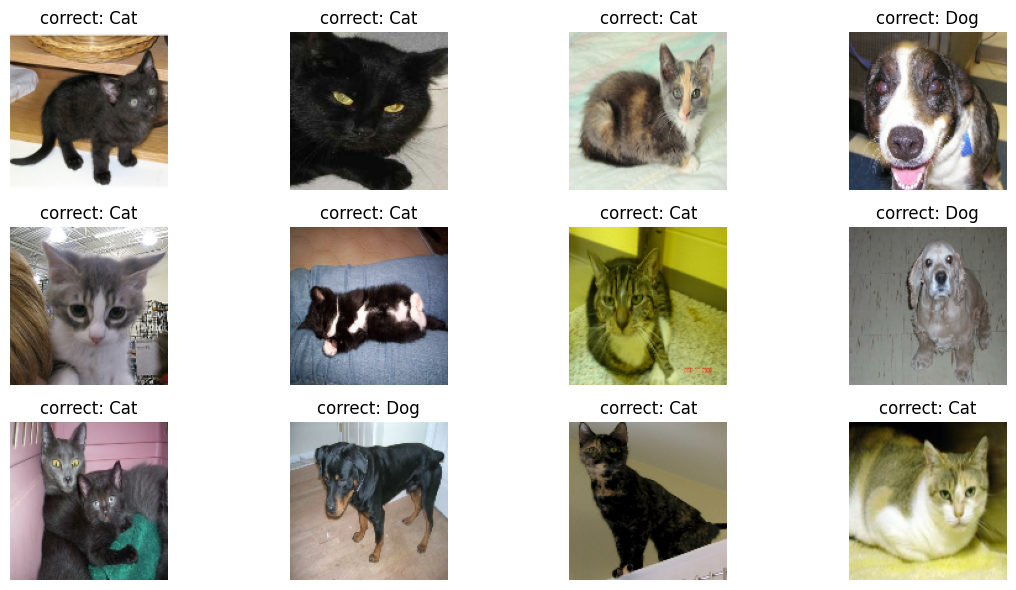

In [48]:
# these already exist from before
# y_true: actual labels
# y_pred_labels: model predictions
# val_images: the actual image data

# get correct prediction indexes
correct_indices = np.where(y_pred_labels == y_true)[0]
# plot 6 correctly classified images
plt.figure(figsize=(12, 6))
for i, idx in enumerate(correct_indices[:12]):
    plt.subplot(3, 4, i+1)
    plt.imshow(val_images[idx].astype("uint8"))
    plt.title(f"correct: {'Dog' if y_true[idx] else 'Cat'}")
    plt.axis('off')
plt.tight_layout()
plt.show()

**ANALYSIS** We also visualized several misclassified images from the validation set. These are images where the model predicted the wrong label (predicted "dog" when it was actually a cat). Many of the errors seemed to occur in images with unclear backgrounds, unusual angles, or when the animals were curled up or partially obscured. This shows that even a well-trained CNN can struggle with ambiguous or lower-quality inputs, and highlights the importance of training with diverse, clean data.

In addition to visualizing misclassified images, I also looked at several examples that the model predicted correctly. These images were generally clearer, well-lit, and had more recognizable animal features like a visible face or body. Comparing correct and incorrect examples side by side shows that image quality, pose, and background noise can have a significant effect on model performance.

In [53]:
from google.colab import files
uploaded = files.upload()  # manually select MLLAB6.ipynb

Saving MLLAB6.ipynb to MLLAB6.ipynb


In [54]:
!jupyter nbconvert --to html MLLAB6.ipynb

[NbConvertApp] Converting notebook MLLAB6.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 11 image(s).
[NbConvertApp] Writing 4422259 bytes to MLLAB6.html


In [55]:
files.download('MLLAB6.html')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>